In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [110]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [23]:
df.isnull().any()    #checking for null values

Category    False
Message     False
dtype: bool

In [24]:
df.isnull().sum()   # checking for null sum

Category    0
Message     0
dtype: int64

In [25]:
df.shape          # checking the shape of dataset

(5572, 2)

In [26]:
df.duplicated().sum()      # checking for duplicates

415

In [27]:
# remove duplicates
df = df.drop_duplicates(keep='first')    

In [28]:
df.duplicated().sum()       # after removing duplicates checking the duplicates

0

In [29]:
df.shape                 # after removing duplicates checking the shape of dataset

(5157, 2)

In [36]:
# counting the no.of spam and harm in the dataset
df.Category.value_counts()


Category
ham     4516
spam     641
Name: count, dtype: int64

In [39]:
## Dictionary of target column numerical assign
Category_labels = {
    'ham' : 0 ,
    'spam' : 1
    }
## Mapping the dictionary to target column

df['Category'] = df['Category'].map(Category_labels)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [41]:
stemmer = PorterStemmer()

In [56]:
## Custom function to process data

def nlp_processing(df):
    
    # Final list to store processed words
    
    text_list = []
    
    for i in range(0,len(df)):
        
        try:
            # Regular expression to remove everything except alphabets
            
            text_processing = re.sub('[^a-zA-Z]',' ',df['Message'][i])
            
            # convert to lowercase for simplicity
            
            text_processing = text_processing.lower()
            
            # split into words
            
            text_processing = text_processing.split()
            
            # stem the words for NLP which are not stopwords
            
            text_processing = [stemmer.stem(words) for words in text_processing if not words in stopwords.words('english')]
        
            # assemble the words
            
            text_processing = ' '.join(text_processing)
            
            # combine into list
            
            text_list.append(text_processing)
        
        except KeyError:
            continue
        
    return text_list
 

In [57]:
# call function on dataset
text_data_train_file = nlp_processing(df)
text_data_train_file

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [58]:
# Vectorizer to create numerical vectors of processed text

def vectorizer(text_processed_list, training_vectorizer=None):
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    if training_vectorizer is None:
        vectorizer = TfidfVectorizer()
        X_col = vectorizer.fit_transform(text_processed_list).toarray()
    else:
        X_col = training_vectorizer.transform(text_processed_list).toarray()
    
    return X_col, vectorizer if training_vectorizer is None else training_vectorizer


In [59]:
X_training_set, vectorizer_for_training = vectorizer(text_data_train_file)
X_training_set


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
# EDA on data
def count_plot(df):
    sns.countplot(x=df['Category'],data=df)
    plt.xticks(ticks=[0,1] , labels=['ham','spam'])
    plt.title('Email category counts')
    

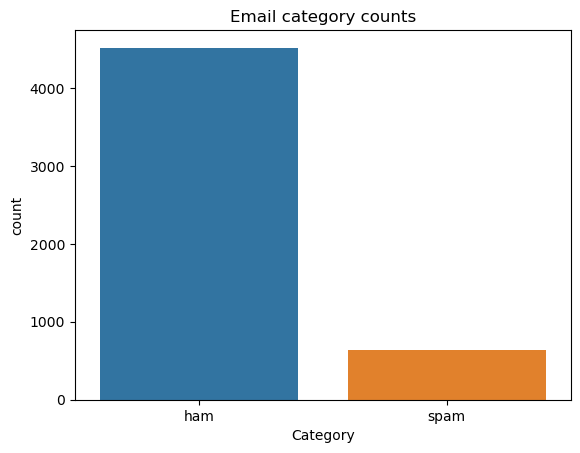

In [63]:
count_plot(df)

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_20300\345379084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Category"])
C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Category', ylabel='Density'>

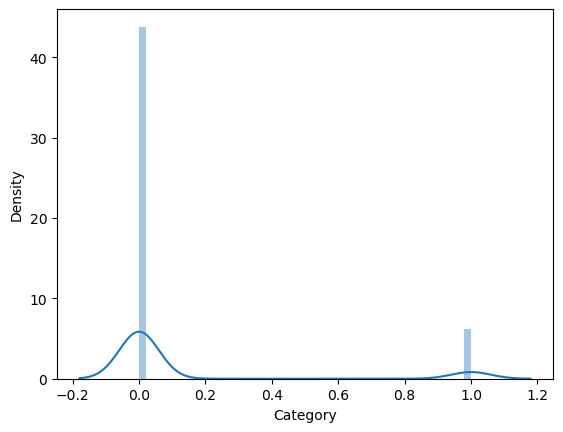

In [69]:
sns.distplot(df["Category"])

In [86]:
# Separating the X and y
X = X_training_set
y = df['Category']
print(X.shape,y.shape)


(4797, 6108) (5157,)


In [87]:
# Determine the minimum number of samples between X and y
min_samples = min(X.shape[0], y.shape[0])

# Adjust the train-test split to use the minimum number of samples
X_train, X_test, y_train, y_test = train_test_split(X[:min_samples], y[:min_samples], test_size=0.25, random_state=1, stratify=y[:min_samples])


In [88]:
# Multi model training

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [101]:
# Define a dictionary of classifiers
classifiers = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

In [102]:
# Train and evaluate each classifier
results = []
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    results.append({"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "Report": report, "Confusion Matrix": matrix})

# Create a DataFrame to store results
results_df = pd.DataFrame(results)

# Print results DataFrame
print("Results Table:")
print(results_df)

Results Table:
                  Model  Accuracy  Precision    Recall  F1-Score  \
0            GaussianNB  0.872500   0.910699  0.872500  0.884827   
1         MultinomialNB  0.958333   0.960231  0.958333  0.954718   
2           BernoulliNB  0.970000   0.969510  0.970000  0.968986   
3   Logistic Regression  0.958333   0.959292  0.958333  0.955066   
4                   SVM  0.974167   0.974056  0.974167  0.973250   
5         Decision Tree  0.949167   0.948504  0.949167  0.948802   
6                   KNN  0.913333   0.921157  0.913333  0.892848   
7         Random Forest  0.970000   0.970676  0.970000  0.968351   
8              AdaBoost  0.960833   0.959677  0.960833  0.959443   
9               Bagging  0.957500   0.956346  0.957500  0.956682   
10          Extra Trees  0.976667   0.977039  0.976667  0.975718   
11    Gradient Boosting  0.962500   0.962593  0.962500  0.960227   
12              XGBoost  0.970000   0.969345  0.970000  0.969375   

                                

In [111]:
# Sort results DataFrame by a performance metric (e.g., accuracy)
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Select the best performing model
best_model_name = sorted_results_df.iloc[0]['Model']

# Print the name of the best performing model
print("Best performing model:", best_model_name)


Best performing model: Extra Trees


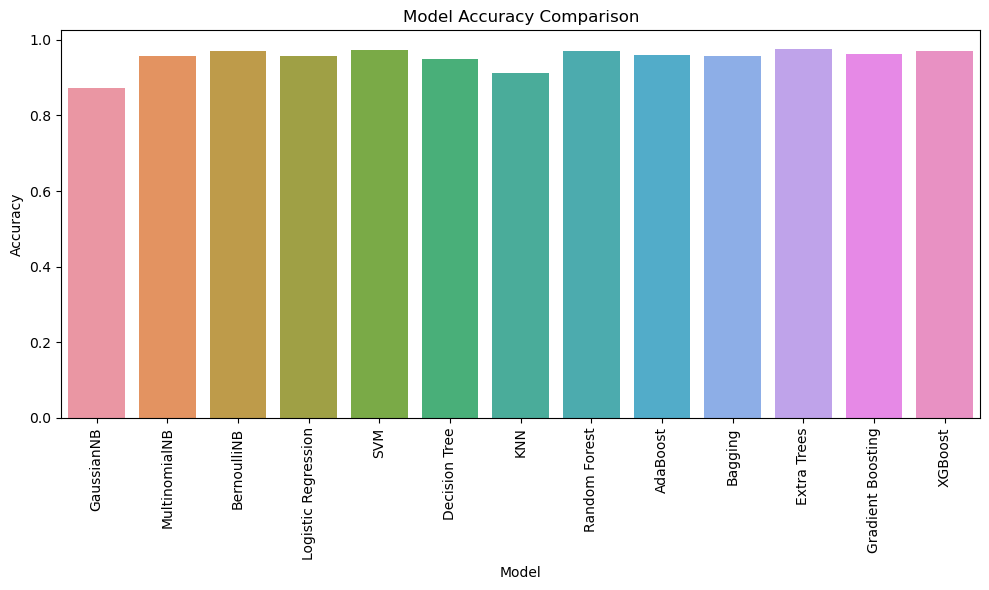

In [104]:
# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [105]:
results_df.to_csv('classification_results.csv', index=False)

In [109]:
import re

def nlp_processing(df):
    text_list = []
    for text in df['message']:
        # Regular expression to remove everything except alphabets
        text_processed = re.sub('[^a-zA-Z]', ' ', text)
        # Convert to lowercase for simplicity
        text_processed = text_processed.lower()
        # Split into words
        words = text_processed.split()
        # Combine into list
        text_list.append(' '.join(words))
    return text_list


# Sample spam message
new_input_string = "Congratulations! You've won a free vacation. Click here to claim your prize."

# Preprocess the new input string data
new_input_processed = nlp_processing(pd.DataFrame({'message': [new_input_string]}))

# Check if new_input_processed is empty
if len(new_input_processed) == 0:
    print("Error: Preprocessed data is empty.")
else:
    # Vectorize the preprocessed new input string data
    X_new_input_vectorized, _ = vectorizer(new_input_processed, training_vectorizer=vectorizer_for_training)

    # Make predictions using the best performing model
    new_input_prediction = best_model.predict(X_new_input_vectorized)
    print("Prediction for the new input message:", new_input_prediction)


Prediction for the new input spam message: [1]


In [ ]:
# 1 indicating the spam here